In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime

%matplotlib inline

In [45]:
covid = pd.read_csv("us-counties.csv")
covid_mo = covid[covid["state"] == "Missouri"]

start = covid_mo['date'].min()
end = covid_mo['date'].max()
dates = covid_mo['date'].unique()


(0, 400)

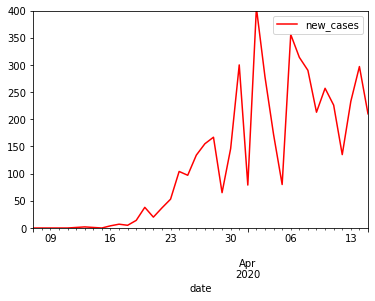

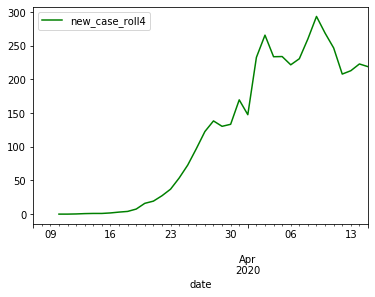

In [141]:
#This method works, but it is better to use the pandas groupby function shown in the next cell

datalist = []

for k in range(len(dates)):
    
    today = dates[k]
    if k == 0:
        yesterday = today
    else:
        yesterday = dates[k-1]
    
    yesterday_df = covid_mo[covid_mo['date'] == yesterday]
    today_df = covid_mo[covid_mo['date'] == today]
    cases_yesterday = yesterday_df['cases'].sum()
    deaths_yesterday = yesterday_df['deaths'].sum()
    cases_today = today_df['cases'].sum()
    deaths_today = today_df['deaths'].sum()
    new_cases = cases_today - cases_yesterday
    new_deaths = deaths_today - deaths_yesterday
    
    datalist.append([today,cases_today,new_cases])
    
    
df = pd.DataFrame(datalist,columns = ["date","cases","new_cases"])
df.set_index("date")

df['new_case_roll4'] = df["new_cases"].rolling(window = 4).mean()

df["date"] =  pd.to_datetime(df["date"])

#ax = plt.figure()


ax1 = df.plot("date","new_cases",color='r')
ax2 = df.plot("date","new_case_roll4",color='g')
ax1.set_ylim(0,400)

#plt.show(ax1,ax2)



In [90]:
datalist = []
covid_mo_grp = covid_mo.groupby(['date'])
print(covid_mo_grp.tail())
#covid_mo_grp[covid_mo_grp['date'] == '2020-04-13']

for k in range(len(dates)):
    
    today = dates[k]
    if k == 0:
        yesterday = today
    else:
        yesterday = dates[k-1]
        
   # cases_today = covid_mo_grp[covid_mo_grp['date'] == today]
covid_mo_grp['cases']

             date      county     state     fips  cases  deaths
706    2020-03-07   St. Louis  Missouri  29189.0      1       0
810    2020-03-08   St. Louis  Missouri  29189.0      1       0
934    2020-03-09   St. Louis  Missouri  29189.0      1       0
1084   2020-03-10   St. Louis  Missouri  29189.0      1       0
1266   2020-03-11   St. Louis  Missouri  29189.0      1       0
...           ...         ...       ...      ...    ...     ...
60680  2020-04-15      Warren  Missouri  29219.0     16       0
60681  2020-04-15  Washington  Missouri  29221.0      2       0
60682  2020-04-15     Webster  Missouri  29225.0      5       0
60683  2020-04-15       Worth  Missouri  29227.0      1       0
60684  2020-04-15      Wright  Missouri  29229.0      9       0

[170 rows x 6 columns]


In [3]:
complete_df = pd.read_csv("covid_19_clean_complete.csv")

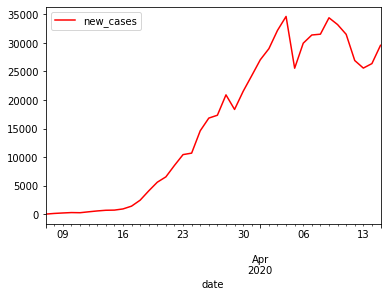

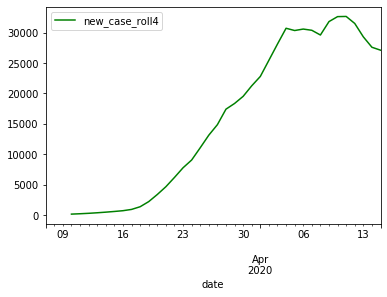

In [147]:
#This method works, but it is better to use the pandas groupby function shown in the next cell

datalist = []

for k in range(len(dates)):
    
    today = dates[k]
    if k == 0:
        yesterday = today
    else:
        yesterday = dates[k-1]
    
    yesterday_df = covid[covid['date'] == yesterday]
    today_df = covid[covid['date'] == today]
    cases_yesterday = yesterday_df['cases'].sum()
    deaths_yesterday = yesterday_df['deaths'].sum()
    cases_today = today_df['cases'].sum()
    deaths_today = today_df['deaths'].sum()
    new_cases = cases_today - cases_yesterday
    new_deaths = deaths_today - deaths_yesterday
    
    datalist.append([today,cases_today,new_cases])
    
    
df = pd.DataFrame(datalist,columns = ["date","cases","new_cases"])
df.set_index("date")

df['new_case_roll4'] = df["new_cases"].rolling(window = 4).mean()

df["date"] =  pd.to_datetime(df["date"])

#ax = plt.figure()


ax1 = df.plot("date","new_cases",color='r')
ax2 = df.plot("date","new_case_roll4",color='g')

